[1. 0. 0.]
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 1.]
[6.123234e-17 0.000000e+00 1.000000e+00]
[0. 1. 0.]
[-1.000000e+00  0.000000e+00  6.123234e-17]
[-1.000000e+00  0.000000e+00  6.123234e-17]


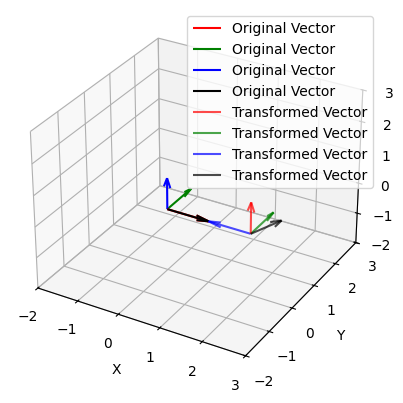

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R
import Utility

def euler_to_rotation_matrix(roll, pitch, yaw, order='XYZ'):
    """
    Converts Euler angles (roll, pitch, yaw) in radians to a rotation matrix.
    
    Parameters:
    - roll: Rotation about the x-axis (in radians).
    - pitch: Rotation about the y-axis (in radians).
    - yaw: Rotation about the z-axis (in radians).
    - order: The order of rotations (e.g., 'XYZ', 'ZYX', etc.).
    
    Returns:
    - rotation_matrix: The corresponding 3x3 rotation matrix.
    """
    # Create a rotation object
    r = R.from_euler(order, [roll, pitch, yaw])
    
    # Return the rotation matrix
    return r.as_matrix()

def apply_transformation(vector, rotation_matrix):
    """
    Applies the transformation (rotation) to a vector.
    
    Parameters:
    - vector: The vector to transform (3D vector).
    - rotation_matrix: The 3x3 rotation matrix.
    
    Returns:
    - transformed_vector: The transformed vector.
    """
    return rotation_matrix @ vector 

def visualize_transformation(original_vector, transformed_vector, vector_in_thigh_frame, vector_base_frame):
    """
    Visualizes the original and transformed vectors and coordinate frames in 3D using Matplotlib.
    
    Parameters:
    - original_vector: The original 3D vector.
    - transformed_vector: The transformed 3D vector.
    - rotation_matrix: The rotation matrix to apply.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the original vector

    ax.quiver(0, 0, 0, *original_vector[0],
              color='red', label="Original Vector", alpha=1.0)
    
    print(original_vector[0])
    
    ax.quiver(0, 0, 0, *original_vector[1],
              color='green', label="Original Vector", alpha=1.0)
    print(original_vector[1])
    
    ax.quiver(0, 0, 0, *original_vector[2], 
              color='blue', label="Original Vector", alpha=1.0)
    print(original_vector[2])
    
    ax.quiver(0, 0, 0, *vector_base_frame, 
              color='black', label="Original Vector", alpha=1.0)
    print(original_vector[2])
    

    

    # Apply the rotation to the original vector to get the transformed vector
    # transformed = apply_transformation(original_vector, rotation_matrix)

    # Plot the transformed vector, offset slightly from the origin for visibility
    ax.quiver(2, 0, 0, *transformed_vector[0],
              color='red', label="Transformed Vector", alpha=0.7)
    print(transformed_vector[0])
    ax.quiver(2, 0, 0, *transformed_vector[1],
              color='green', label="Transformed Vector", alpha=0.7)
    print(transformed_vector[1])
    ax.quiver(2, 0, 0, *transformed_vector[2],
              color='blue', label="Transformed Vector", alpha=0.7)
    print(transformed_vector[2])
    
    ax.quiver(2, 0, 0, *vector_in_thigh_frame,
              color='black', label="Transformed Vector", alpha=0.7)
    print(transformed_vector[2])

    # Set labels for axes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Set the plot limits to allow full view of vectors
    ax.set_xlim([-2, 3])
    ax.set_ylim([-2, 3])
    ax.set_zlim([-2, 3])

    # Display grid and legend
    ax.grid(True)
    ax.legend()

    # Show the plot
    plt.show()


# Example Usage
original_vector = np.eye(3)



rotation_matrix =  Utility.get_R_y(-np.pi/2)  



# Apply the transformation
transformed_vector = apply_transformation(original_vector.T, rotation_matrix)

# re_transformed_vector = apply_transformation(transformed_vector, rotation_matrix.T)   


## 45 degree rotation about y
rotation_matrix_45 =  Utility.get_R_y(np.pi/4)

# in the transformed vector space
vector_in_thigh_frame = rotation_matrix_45 @ transformed_vector.T[0]


vector_in_base_frame = rotation_matrix_45.T @ rotation_matrix.T @ vector_in_thigh_frame @ rotation_matrix_45

# vector_in_base_frame_w_o_rotation = rotation_matrix.T @ transformed_vector.T[0]
# rotation_in_base_frame = rotation_matrix.T @ rotation_matrix_45


# vector_in_base_frame = rotation_in_base_frame @ vector_in_base_frame_w_o_rotation


# Visualize the transformation and coordinate frames
visualize_transformation(original_vector, transformed_vector.T, vector_in_thigh_frame, vector_in_base_frame)


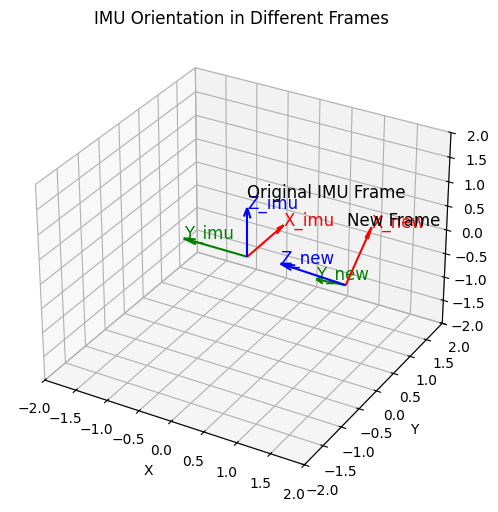

Original Quaternion: [0.         0.         0.70710678 0.70710678]
Transformed Quaternion in New Frame: [ 0.         -0.5         0.5         0.70710678]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

def plot_frame(ax, origin, rot, label, color_map):
    """Plots a 3D coordinate frame given a rotation."""
    length = 1.0  # Arrow length
    basis_vectors = np.eye(3)  # Standard basis vectors [x, y, z]

    rotated_vectors = rot.apply(basis_vectors)

    for i, (vec, color) in enumerate(zip(rotated_vectors, color_map)):
        ax.quiver(*origin, *vec, color=color, length=length, arrow_length_ratio=0.2)
        ax.text(*(origin + vec), label[i], color=color, fontsize=12)

# Step 1: Define original IMU quaternion (90° rotation about Z-axis)
q_imu = R.from_euler('z', 90, degrees=True)

# Step 2: Define reference frame rotation (e.g., 45° about X-axis)
q_ref = R.from_euler('x', 45, degrees=True)

# Step 3: Transform quaternion to the new reference frame
q_new = q_ref * q_imu * q_ref.inv()

# Step 4: Visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('IMU Orientation in Different Frames')

# Plot original IMU frame
plot_frame(ax, origin=np.array([0, 0, 0]), rot=q_imu, label=['X_imu', 'Y_imu', 'Z_imu'], color_map=['r', 'g', 'b'])

# Plot new frame after transformation
plot_frame(ax, origin=np.array([1.5, 0, 0]), rot=q_new, label=['X_new', 'Y_new', 'Z_new'], color_map=['r', 'g', 'b'])

# Legend
ax.text(0, 0, 1.2, 'Original IMU Frame', color='k', fontsize=12)
ax.text(1.5, 0, 1.2, 'New Frame', color='k', fontsize=12)

plt.show()

# Print results
print("Original Quaternion:", q_imu.as_quat())  # [x, y, z, w]
print("Transformed Quaternion in New Frame:", q_new.as_quat())  # [x, y, z, w]
